In [1]:
from skimage.feature import graycomatrix, graycoprops

# Hitung fitur GLCM
def compute_glcm(image, angles):
    glcm = graycomatrix(image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
    return glcm

In [2]:
import numpy as np

# Hitung matriks GLCM
def glcm_matrix(image):
    matrix = []
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    metric_texture = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
    for i in metric_texture:
        row = []
        for j in angles:
            row.append(graycoprops(compute_glcm(image, [j]), prop=i)[0][0])
        matrix.append(row)
    return np.array(matrix).flatten()

In [3]:
X = []  # Features
y = []  # Labels

In [4]:
import os
from skimage import io, color, util

# Load citra dengan ekspresi happy
positive_images = os.listdir("dataset/happy/")
for img_path in positive_images:
    image = io.imread("dataset/happy/" + img_path)
    features = glcm_matrix(image)
    X.append(features)
    y.append(1)  # Sentimen positif

In [5]:
# Load citra dengan ekspresi sad
negative_images = os.listdir("dataset/sad/")
for img_path in negative_images:
    image = io.imread("dataset/sad/" + img_path)
    features = glcm_matrix(image)
    X.append(features)
    y.append(0)  # Sentimen negatif

In [6]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

k = [3, 5, 7, 9]
accuracy = []

for i in k:
    m = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    joblib.dump(m, "models/model_" + str(i))

    acc = round(m.score(X_test, y_test) * 100, 2)
    joblib.dump(acc, "models/acc_" + str(i))

    accuracy.append(acc)

In [8]:
best_k = k[accuracy.index(max(accuracy))]
best_model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
joblib.dump(best_model, "models/best_model")

best_acc = max(accuracy)
joblib.dump(best_acc, "models/best_acc")

['model/best_acc']

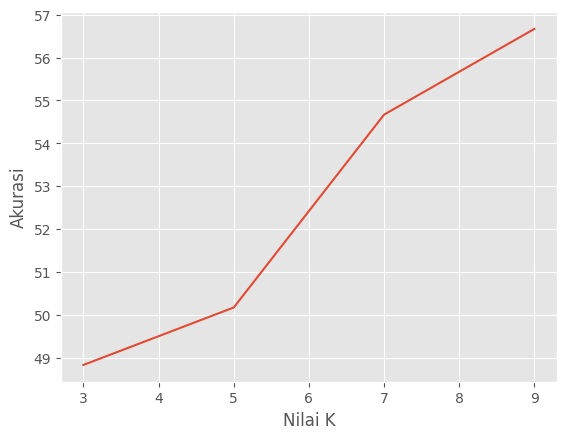

In [10]:
import matplotlib.pyplot as plt

plt.plot(k, accuracy)
plt.xlabel("Nilai K")
plt.ylabel("Akurasi")
plt.style.use("ggplot")
plt.show()